In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1 способ построения предсказательной модели

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 2 способ построения предсказательной модели
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

### Задание 1

Базово изучите датасет (достаточно методов info() и describe()).
Выдвиньте пару гипотез, например, “Верно ли, что чем выше ВВП, тем выше и уровень счастья?” или “Есть ли взаимосвязь между уровнем доверия правительству и уровнем счастья?”. Постарайтесь подтвердить или опровергнуть их визуально и с помощью расчётов.
Желательно, но не обязательно:
Составьте корреляционную матрицу всех числовых признаков набора данных и визуализируйте её с помощью тепловой карты.

In [64]:
hc = pd.read_csv('happines_corruption.csv')

In [65]:
hc.tail(3)

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
789,Rwanda,3.3123,0.343243,0.0,0.572383,0.604088,0.235705,0.485542,0.548445,Africa,2020,0.522876,54
790,Zimbabwe,3.2992,0.425564,0.0,0.375038,0.377405,0.151349,0.080929,0.841031,Africa,2020,1.047835,24
791,Afghanistan,2.5669,0.300706,0.0,0.266052,0.000000,0.135235,0.001226,1.507236,Asia,2020,0.356434,19


In [66]:
hc.describe()

,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,Year,social_support,cpi_score
count,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000
mean,5.473310,0.929217,0.504998,0.648691,0.427016,0.212440,0.125720,1.379277,2017.500000,0.609302,44.327020
std,1.124726,0.385774,0.552736,0.232261,0.148003,0.121660,0.109032,1.075276,1.708904,0.640754,19.508833
min,2.566900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,0.000000,11.000000
25%,4.590750,0.644242,0.000000,0.510070,0.325433,0.125784,0.052862,0.000000,2016.000000,0.000000,30.000000
50%,5.485500,0.994544,0.000000,0.685397,0.439621,0.197000,0.089000,1.731948,2017.500000,0.176214,38.000000
75%,6.300500,1.228677,1.040410,0.815641,0.546280,0.273250,0.154250,2.236894,2019.000000,1.268250,57.000000
max,7.808700,2.096000,1.610574,1.141000,0.724000,0.838075,0.551910,3.602140,2020.000000,1.644000,91.000000


In [67]:
hc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            792 non-null    object 
 1   happiness_score    792 non-null    float64
 2   gdp_per_capita     792 non-null    float64
 3   family             792 non-null    float64
 4   health             792 non-null    float64
 5   freedom            792 non-null    float64
 6   generosity         792 non-null    float64
 7   government_trust   792 non-null    float64
 8   dystopia_residual  792 non-null    float64
 9   continent          792 non-null    object 
 10  Year               792 non-null    int64  
 11  social_support     792 non-null    float64
 12  cpi_score          792 non-null    int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 80.6+ KB


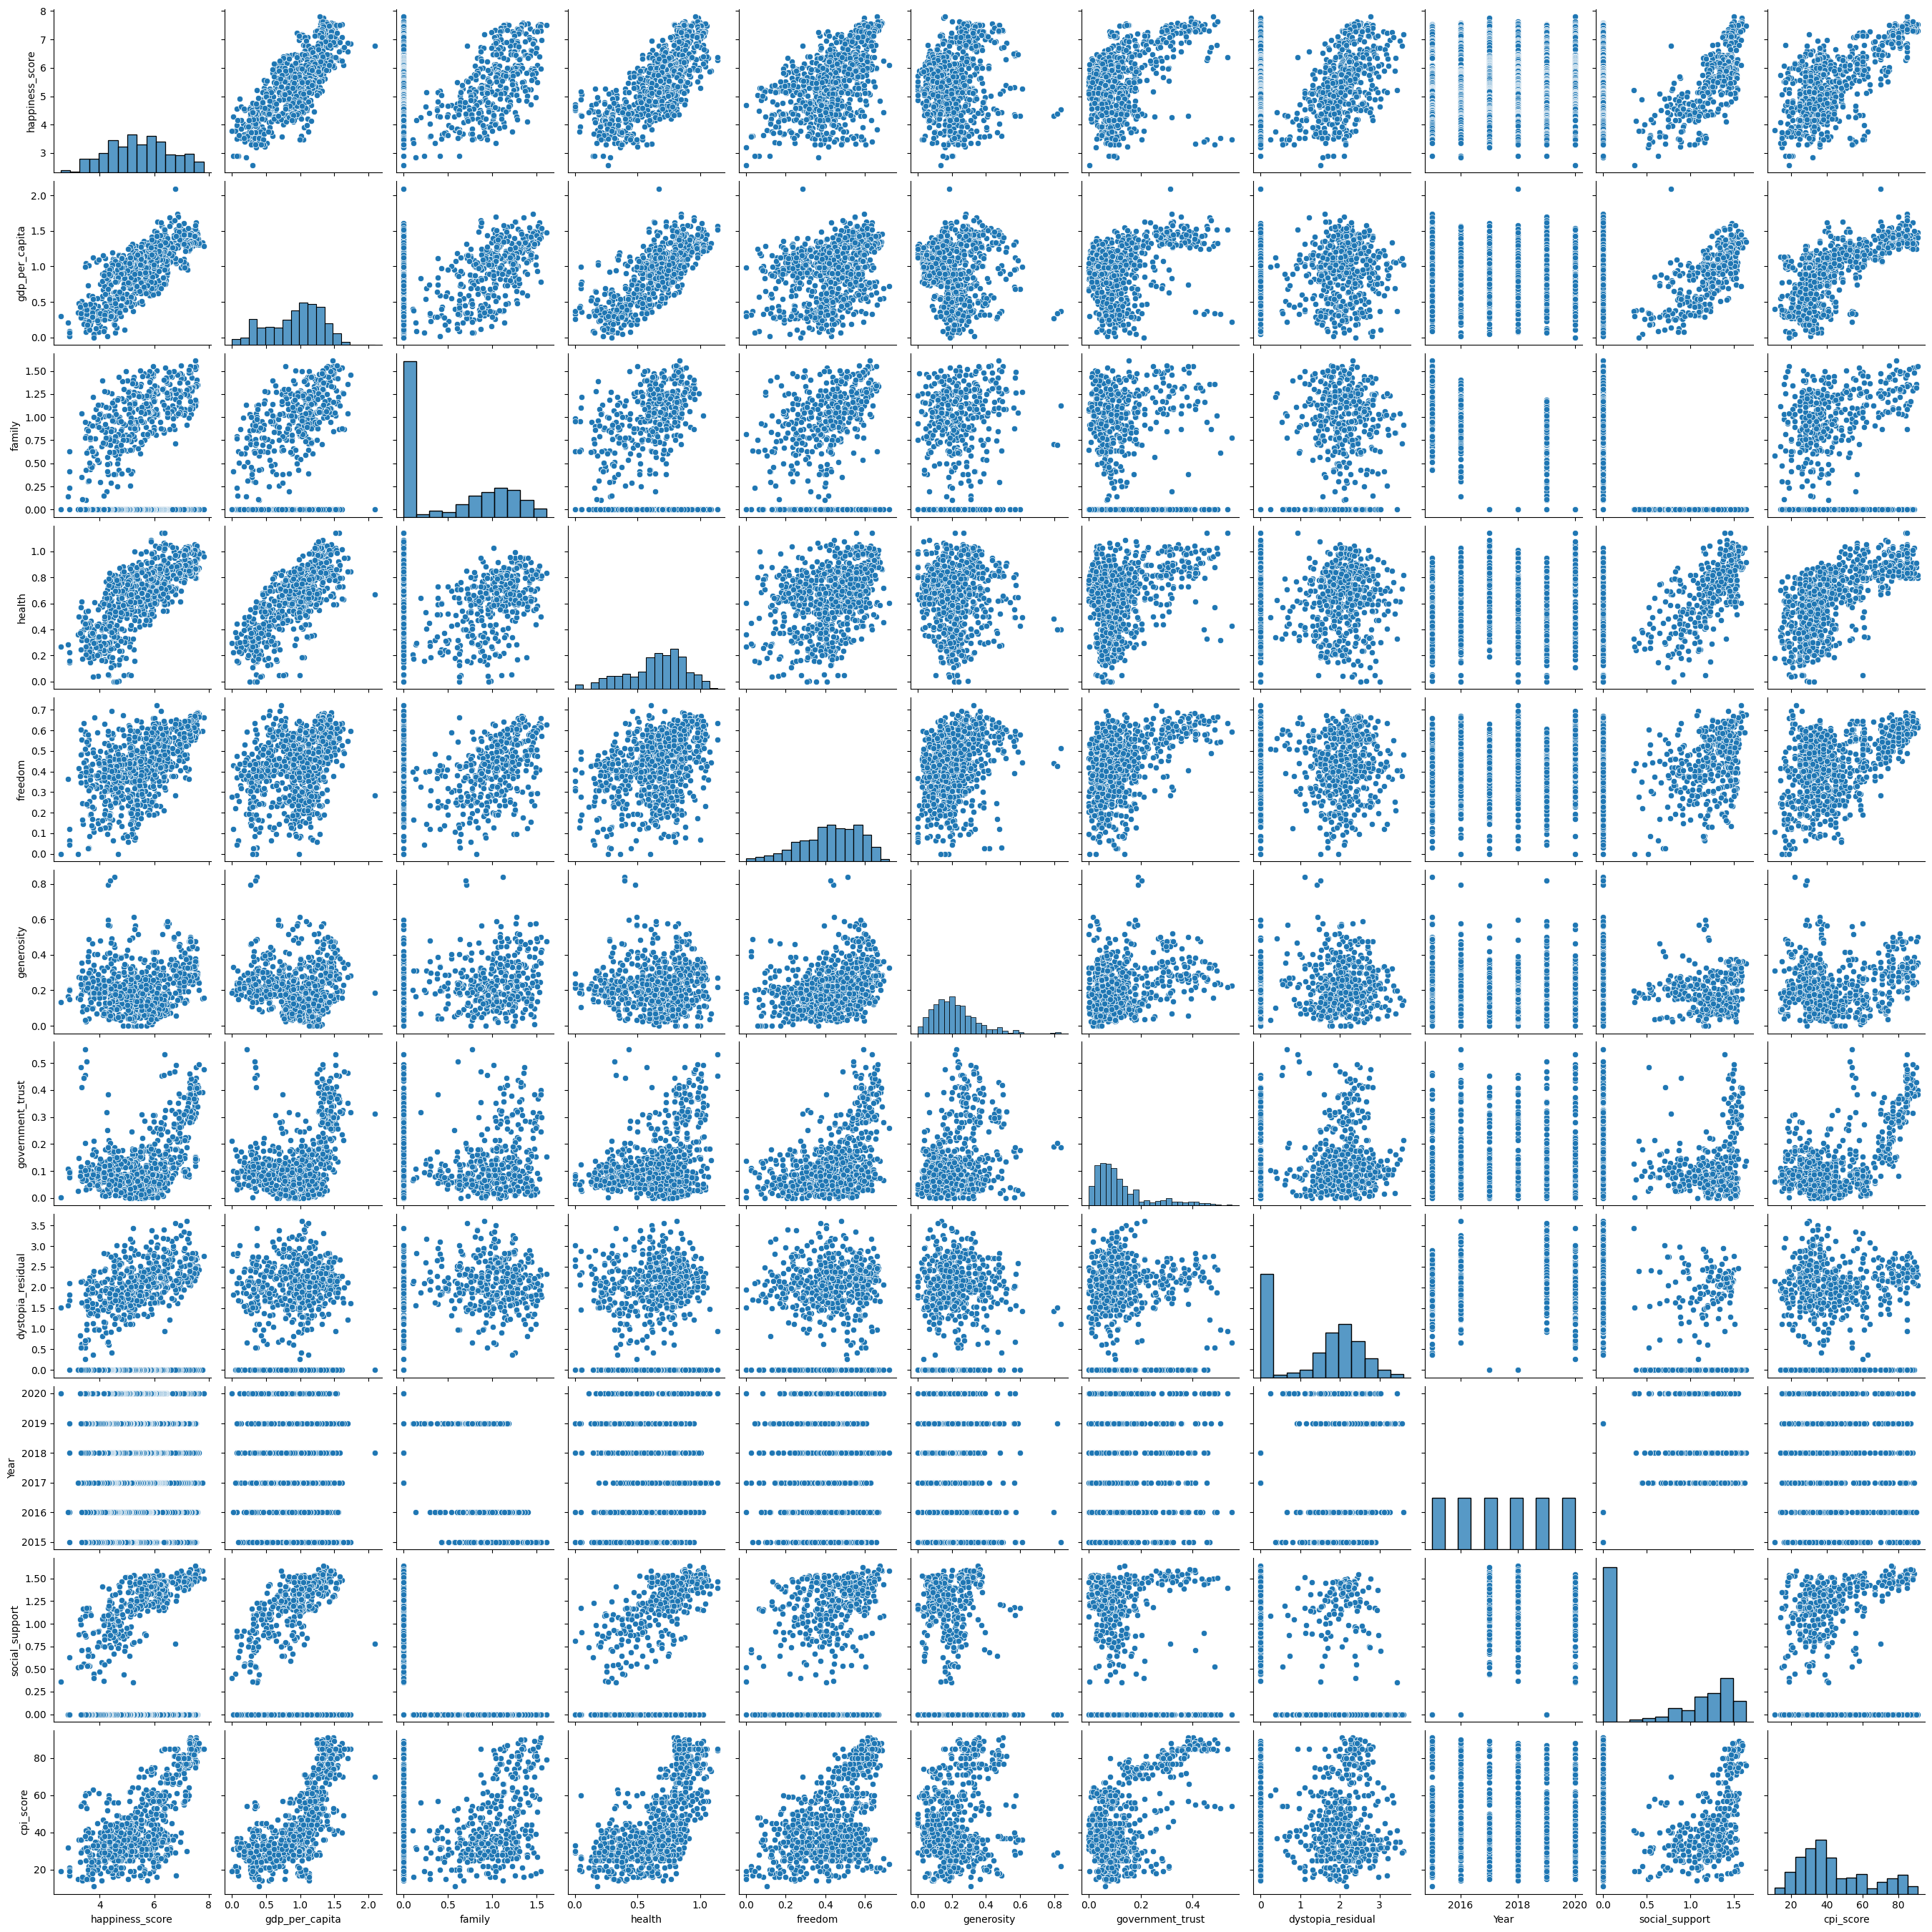

In [68]:
sns.pairplot(hc)

In [69]:
hcf = hc[['happiness_score', 'gdp_per_capita', 'family', 'health',
       'freedom', 'generosity', 'government_trust', 'dystopia_residual',
       'social_support', 'cpi_score']]

<Axes: >

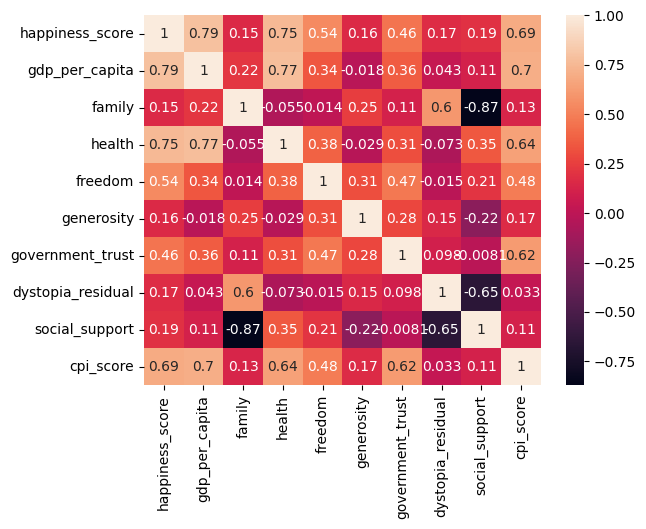

In [70]:
sns.heatmap(hcf.corr(), annot=True)

Ну что прям бросается в глаза, так отрицательная корреляция между степенью влияния семьи и социальной поддержики на уровень счастья.
Но тут на самом деле непонятные какие-то данные.... Это не проценты, так как есть цифры больше 1. Но это и не абсолютные величины.....
То есть получается, что чем больше семья влияет на уровень счастья, тем меньше влияет на него социальная поддержка....
Посмотрев на график видно, что там где влияние социальной поддержки равно 0, влияние семьи на уровень счастья есть, а где влияние семьи на уровень счастья 0, там социальная поддержка больше 0. Есть только 1 случай когда и то и то = 0.

In [71]:
hc[(hc.social_support==0) & (hc.family==0)]

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
658,Togo,3.303,0.28123,0.0,0.24811,0.34678,0.17517,0.11587,2.1354,Africa,2019,0.0,29


In [72]:
hc[(hc.social_support>0) & (hc.family>0)]

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score


Какая-то лажа..... 

Показатели влияния Здоровья, ВВП и индекса внутренних цен очень значительно коррелируют в положительную сторону с уровнем счастья.
Уровень доверия правительству с индексом потребительских цен.
На самом деле не понятен вопрос, а если я не доверяю правительству и чувствую себя несчастной это же прямая корреляция, при этом оба показателя будут высокими? или один будет низким? То есть это же степень влияния.......Степень влияния большая... Коррелияция положительная..... Уровень счастья низкий, тогда по идее и доверие правительству должно быть низким.... Но это же степень влияния доверия правительству а не само доверие, тогда значит этот показатель должен быть высоким...... А счастье низкое. Значит корреляция должна быть отрицательная......
Вообщем перейдем лучше к регрессии...

### Задание 2
Продолжаем изучать цены на газ в Южной Корее. Файл с данными “gas_sales_data.csv” вы сможете найти в материалах занятия (для этого набора данных вы ранее рассчитывали коэффициенты корреляции в тренажере).

В этом задании нужно окончательно ответить на вопрос:
Есть ли связь между среднемесячной температурой и потреблением газа в Южной Корее?

Для этого:

Оставьте только два столбца:'Temperature' и 'Sum'.
Постройте диаграмму рассеяния.
Постройте модель линейной регрессии для выбранных признаков.
Рассчитайте точность модели на тестовой выборке.
Выведите график остатков.

In [73]:
gas = pd.read_csv('gas_sales_data.csv')[['Temperature', 'Sum']]
gas.head(3)

,Temperature,Sum
0,-1.20,1717175
1,-0.99,1766341
2,6.64,1490537


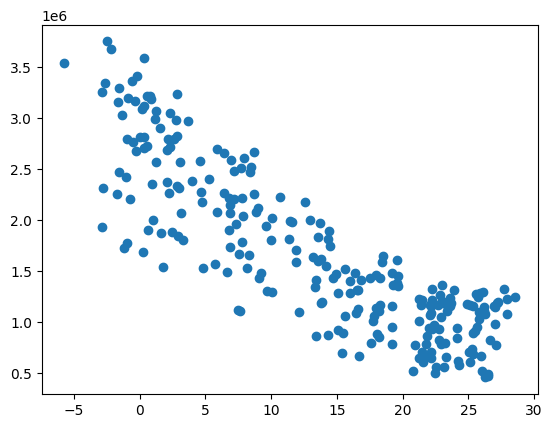

In [74]:
plt.scatter(gas['Temperature'], gas['Sum'])

Ну чувствуется да, что что-то такое есть....... Отрицательная взаимосвязь

In [75]:
X = gas[['Temperature']]
y = gas['Sum']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [77]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(176, 1) (76, 1) (176,) (76,)


In [78]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [79]:
model.coef_

array([-69183.68395953])

In [80]:
model.intercept_

np.float64(2571665.5705572804)

In [81]:
y_pred = model.predict(X_test)

In [82]:
model.score(X_test, y_test)

0.769403571876491

Text(0.5, 1.0, 'Predict_model')

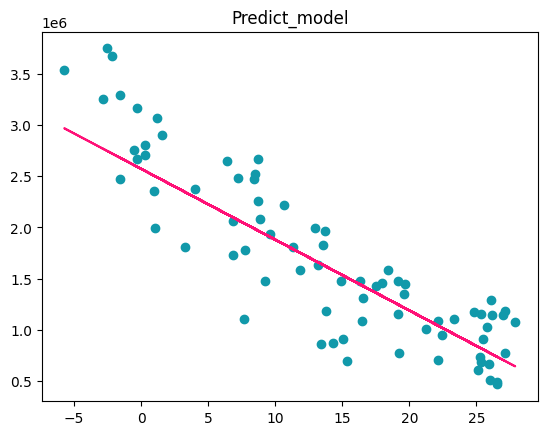

In [83]:
plt.scatter(X_test, y_test, c='#1199AA')
plt.plot(X_test, y_pred, c='#FF1177')
plt.title('Predict_model')

Альтернативный способ построения регрессионной модели

In [84]:
X_const = sm.add_constant(X_train) # добиваем константу вручную

In [85]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    Sum   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     438.1
Date:                Mon, 05 May 2025   Prob (F-statistic):           2.13e-49
Time:                        15:55:45   Log-Likelihood:                -2525.3
No. Observations:                 176   AIC:                             5055.
Df Residuals:                     174   BIC:                             5061.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.572e+06   5.39e+04     47.695      

In [86]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  const          2.571666e+06
Temperature   -6.918368e+04
dtype: float64
R2:  0.7157287338799033


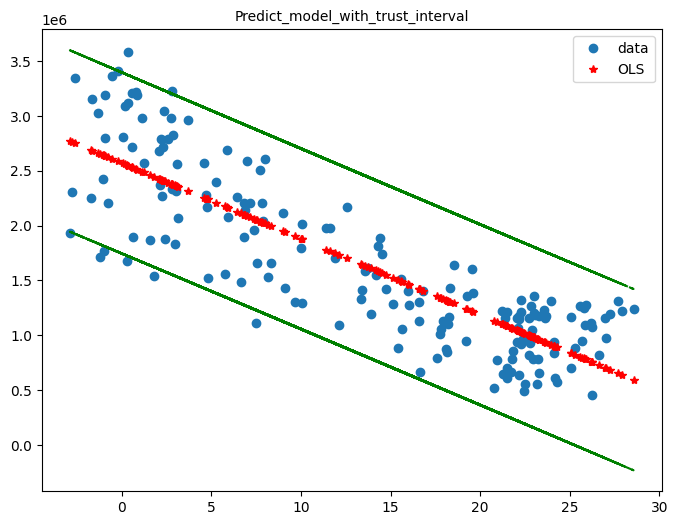

In [87]:
prstd, iv_l, iv_u = wls_prediction_std(results)
# для каждой точки получаем не просто сам прогноз, но и доверительный интервал
# с увеличением количества факторов, этот интервал будет уменьшаться
fig, ax = plt.subplots(figsize=(8,6))
ax.set_title("Predict_model_with_trust_interval", fontsize=10)
ax.plot(X_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r*', label="OLS")
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best')

(array([ 3.,  3.,  0.,  1.,  1.,  2.,  7.,  4.,  4.,  9.,  4.,  7.,  6.,
         8.,  5.,  6., 13.,  3.,  8.,  8., 13., 10.,  5.,  8.,  6.,  3.,
         9.,  4.,  5.,  4.,  3.,  1.,  0.,  2.,  0.,  0.,  1.]),
 array([-943359.61454001, -889808.3622868 , -836257.1100336 ,
        -782705.85778039, -729154.60552719, -675603.35327398,
        -622052.10102078, -568500.84876758, -514949.59651437,
        -461398.34426117, -407847.09200796, -354295.83975476,
        -300744.58750155, -247193.33524835, -193642.08299514,
        -140090.83074194,  -86539.57848874,  -32988.32623553,
          20562.92601767,   74114.17827088,  127665.43052408,
         181216.68277729,  234767.93503049,  288319.18728369,
         341870.4395369 ,  395421.6917901 ,  448972.94404331,
         502524.19629651,  556075.44854972,  609626.70080292,
         663177.95305612,  716729.20530933,  770280.45756253,
         823831.70981574,  877382.96206894,  930934.21432215,
         984485.46657535, 1038036.71882856]),

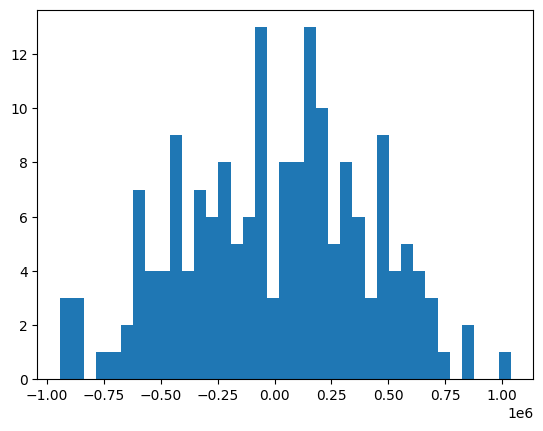

In [88]:
plt.hist(results.resid, bins=37)

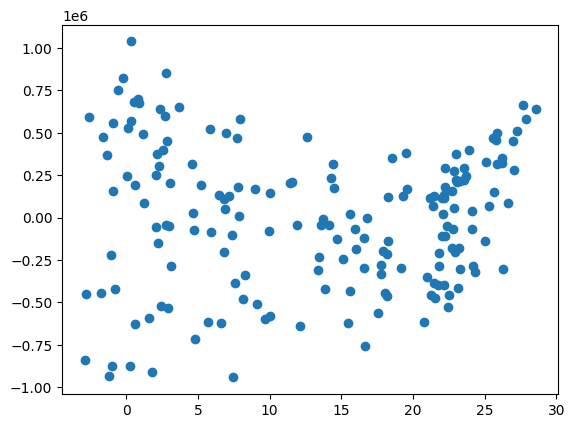

In [89]:
plt.scatter(X_const.iloc[:, 1], results.resid)